In [1]:
# 
import json
import cv2
import requests
import uuid
from tencentcloud.common import credential
from tencentcloud.common.profile.client_profile import ClientProfile
from tencentcloud.common.profile.http_profile import HttpProfile
from tencentcloud.common.exception.tencent_cloud_sdk_exception import TencentCloudSDKException
from tencentcloud.ocr.v20181119 import ocr_client, models
from tencentcloud.ocr.v20181119 import models as ocr_models
import numpy as np
import base64
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
with open("../tencent_key.json" ,'r') as key:
    SecretDict=json.loads(key.read())
SecretId=SecretDict["SecretId"]
SecretKey=SecretDict["SecretKey"]

In [2]:
"""

通用印刷体识别（高精度版）
https://console.cloud.tencent.com/api
/explorer?Product=ocr&Version=2018-11-19&Action=GeneralAccurateOCR&SignVersion=
"""


try: 
    cred = credential.Credential(SecretId, SecretKey) 
    httpProfile = HttpProfile()
    httpProfile.endpoint = "ocr.tencentcloudapi.com"

    clientProfile = ClientProfile()
    clientProfile.httpProfile = httpProfile
    client = ocr_client.OcrClient(cred, "ap-beijing", clientProfile) 
    img_path="./images/en1.jpg"
    with open(img_path,"rb") as file:
        img=base64.b64encode(file.read()) 
    req = ocr_models.EnglishOCRRequest()

    params = {
        "ImageBase64": str(img,encoding="utf-8"),
#         "ImageUrl": "",
        "EnableCoordPoint": False,
        "EnableCandWord": False,
        "Preprocess": True
    }
    req.from_json_string(json.dumps(params))

    resp = client.EnglishOCR(req).to_json_string() 
     
    resp=json.loads(resp)
    print(resp)  

except TencentCloudSDKException as err: 
    print(err) 



{'TextDetections': [{'DetectedText': '"It is in writing that, unless they give themselves in, the Taliban will arrest and', 'Confidence': 99, 'Polygon': [{'X': 35, 'Y': 19}, {'X': 748, 'Y': 19}, {'X': 748, 'Y': 37}, {'X': 35, 'Y': 37}], 'AdvancedInfo': '{}', 'WordCoordPoint': [], 'CandWord': [], 'Words': [{'Confidence': 99, 'Character': '"'}, {'Confidence': 99, 'Character': 'It'}, {'Confidence': 99, 'Character': 'is'}, {'Confidence': 99, 'Character': 'in'}, {'Confidence': 99, 'Character': 'writing'}, {'Confidence': 99, 'Character': 'that'}, {'Confidence': 99, 'Character': ','}, {'Confidence': 99, 'Character': 'unless'}, {'Confidence': 100, 'Character': 'they'}, {'Confidence': 100, 'Character': 'give'}, {'Confidence': 99, 'Character': 'themselves'}, {'Confidence': 100, 'Character': 'in'}, {'Confidence': 99, 'Character': ','}, {'Confidence': 99, 'Character': 'the'}, {'Confidence': 99, 'Character': 'Taliban'}, {'Confidence': 99, 'Character': 'will'}, {'Confidence': 99, 'Character': 'arres

In [3]:
resp["TextDetections"]

[{'DetectedText': '"It is in writing that, unless they give themselves in, the Taliban will arrest and',
  'Confidence': 99,
  'Polygon': [{'X': 35, 'Y': 19},
   {'X': 748, 'Y': 19},
   {'X': 748, 'Y': 37},
   {'X': 35, 'Y': 37}],
  'AdvancedInfo': '{}',
  'WordCoordPoint': [],
  'CandWord': [],
  'Words': [{'Confidence': 99, 'Character': '"'},
   {'Confidence': 99, 'Character': 'It'},
   {'Confidence': 99, 'Character': 'is'},
   {'Confidence': 99, 'Character': 'in'},
   {'Confidence': 99, 'Character': 'writing'},
   {'Confidence': 99, 'Character': 'that'},
   {'Confidence': 99, 'Character': ','},
   {'Confidence': 99, 'Character': 'unless'},
   {'Confidence': 100, 'Character': 'they'},
   {'Confidence': 100, 'Character': 'give'},
   {'Confidence': 99, 'Character': 'themselves'},
   {'Confidence': 100, 'Character': 'in'},
   {'Confidence': 99, 'Character': ','},
   {'Confidence': 99, 'Character': 'the'},
   {'Confidence': 99, 'Character': 'Taliban'},
   {'Confidence': 99, 'Character': 

In [4]:
DetectedTextList=[]
PolygonList=[]
for content in resp["TextDetections"]:
    DetectedTextList.append(content["DetectedText"])
    PolygonList.append(content['Polygon'])
    
''.join(DetectedTextList)

'"It is in writing that, unless they give themselves in, the Taliban will arrest andprosecute, interrogate and punish family members on behalf of those"individuals.\'He warned that anyone on the Taliban\'s blacklist was in severe danger, andthat there could be mass executions.Foreign powers are continuing efforts to get their nationals out ofAfghanistan. A Nato official said on Friday that more than 18,000 people havebeen evacuated in the last five days from Kabul airport.Some 6,000 more, among them former interpreters for foreign armed forces,are on standby to be flown out late on Thursday or early Friday.The aim is to double evacuation efforts over the weekend, the official said.'

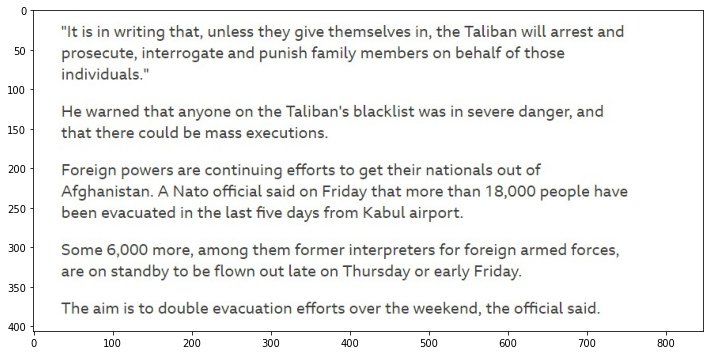

In [5]:
plt.figure(figsize=(12,12))
img=plt.imread(img_path)
plt.imshow(img)

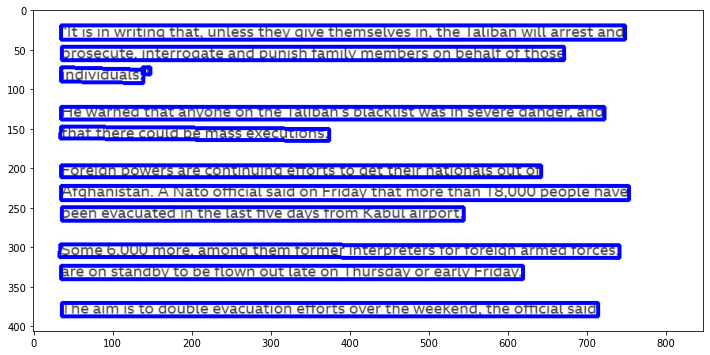

In [6]:
plt.figure(figsize=(12,12))
res=plt.imread(img_path)
for pts in PolygonList:
#     print(pts)
    points=np.array([[pt["X"],pt["Y"]] for pt in pts],np.int32)
    points.reshape((-1,1,2))
    res=cv2.polylines(img=res, pts=[points], isClosed=True, color=(0,0,255), thickness=3)
plt.imshow(res)